In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

In [96]:
data=pd.read_csv('C:\Adhrit_066\oasis_longitudinal.csv')
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [98]:
unwanted_cols=['MRI ID','Hand','MR Delay','Subject ID']
data=data.drop(unwanted_cols,axis=1)

In [99]:
le=LabelEncoder()
data['Group']=le.fit_transform(data['Group'])
data['M/F']=le.fit_transform(data['M/F'])

In [100]:
data=data.dropna()

In [101]:
X=data.drop(columns=['Group'])
Y=data['Group']

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

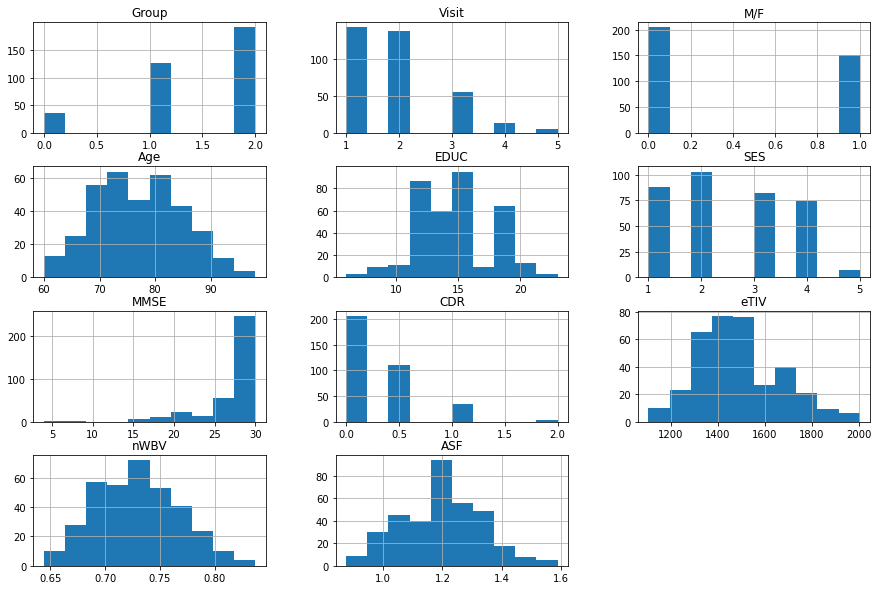

In [103]:
data.hist(figsize=(15,10))
plt.show()

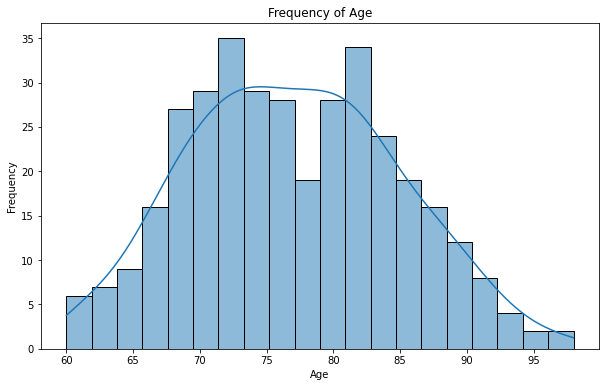

In [104]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'],bins=20,kde=True)
plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

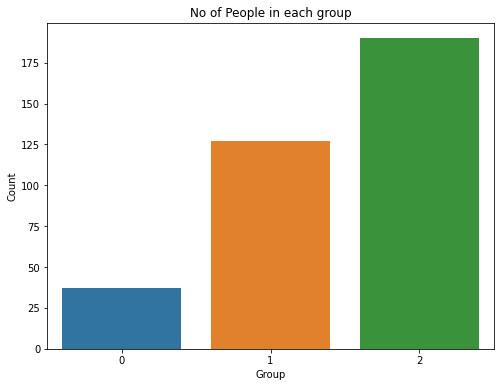

In [105]:
plt.figure(figsize=(8,6))
sns.countplot(x='Group',data=data)
plt.title('No of People in each group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

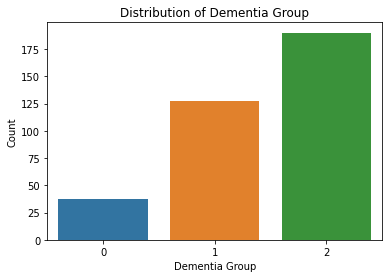

In [106]:
sns.countplot(x='Group',data=data)
plt.title('Distribution of Dementia Group')
plt.xlabel('Dementia Group')
plt.ylabel('Count')
plt.show()

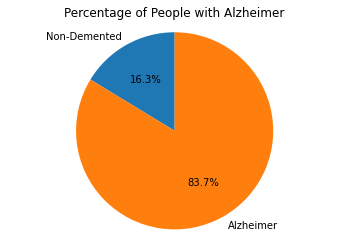

In [107]:
alzheimer_count=data[data['Group']==2].shape[0]
non_demented_count=data[data['Group']==0].shape[0]
labels=['Non-Demented','Alzheimer']
sizes=[non_demented_count,alzheimer_count]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Percentage of People with Alzheimer')
plt.show()

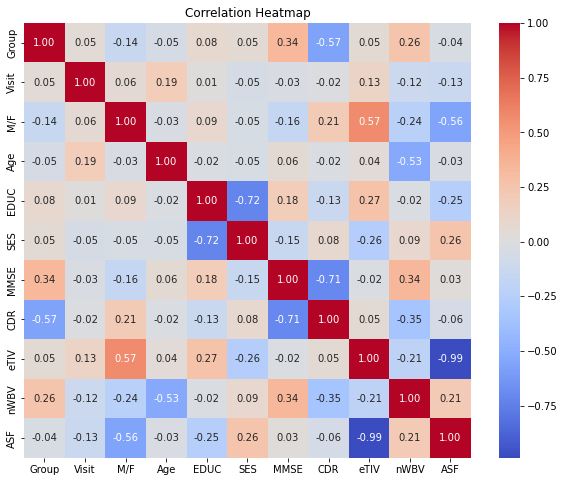

In [108]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [109]:
#One Vs Rest Classifier
ovr_classifier_rf=OneVsRestClassifier(RandomForestClassifier())
ovr_classifier_rf.fit(X_train,Y_train)
ovr_pred_rf=ovr_classifier_rf.predict(X_test)
ovr_classifier_rf.predict(X_test)
ovr_accuracy_rf=accuracy_score(Y_test,ovr_pred_rf)
print("One vs Rest Classifier (Random Forest) Accuracy:", ovr_accuracy_rf)

One vs Rest Classifier (Random Forest) Accuracy: 0.9014084507042254


In [110]:
#One Vs One Classifier
ovo_classifier_rf=OneVsOneClassifier(RandomForestClassifier())
ovo_classifier_rf.fit(X_train,Y_train)
ovo_pred_rf=ovo_classifier_rf.predict(X_test)
ovo_classifier_rf.predict(X_test)
ovo_accuracy_rf=accuracy_score(Y_test,ovo_pred_rf)
print("One vs One Classifier (Random Forest) Accuracy:", ovo_accuracy_rf)

One vs One Classifier (Random Forest) Accuracy: 0.8873239436619719
